In [1]:
# Required to use in Google Colab
!pip install future
!git clone https://github.com/BubaVV/Pyevolve.git
!cd Pyevolve && python3 setup.py install && mv pyevolve/ ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'Pyevolve'...
remote: Enumerating objects: 1288, done.
remote: Total 1288 (delta 0), reused 0 (delta 0), pack-reused 1288
Receiving objects: 100% (1288/1288), 2.68 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (802/802), done.
running install
running bdist_egg
running egg_info
creating Pyevolve.egg-info
writing Pyevolve.egg-info/PKG-INFO
writing dependency_links to Pyevolve.egg-info/dependency_links.txt
writing requirements to Pyevolve.egg-info/requires.txt
writing top-level names to Pyevolve.egg-info/top_level.txt
writing manifest file 'Pyevolve.egg-info/SOURCES.txt'
writing manifest file 'Pyevolve.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/pyevolve
copying pyevolve/Consts.py -> build/lib/pyevolve
copying pyevolve/Initializators.py -> build/lib/pyevol

In [2]:
# Imports for this practical work
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Consts
from pyevolve import Crossovers
from pyevolve import Mutators
from pyevolve import Selectors
from pyevolve import DBAdapters
from geopy.distance import geodesic
import matplotlib.pyplot as plt 
import random

In [3]:
# Cities coordinates
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [4]:
cities = list(zip(LAT, LON))

In [5]:
def matrix_dist(list_cities):
  matrix = {}
  for i,c1 in enumerate(list_cities):
    for j,c2 in enumerate(list_cities):
      matrix[i, j] = geodesic(c1, c2).km
  return matrix

matrix_cities = matrix_dist(cities)

In [6]:
def total_dist_tour(tour):
  total = 0
  t = tour.getInternalList()
  for i in range(len(cities)):
    j = (i + 1) % len(cities)
    total += matrix_cities[t[i], t[j]]
  return total

In [7]:
def fitness(chromosome):
  return total_dist_tour(chromosome)

In [8]:
def G1DListTSPInitializator(genome, **args):
  lst = [i for i in range(genome.getListSize())]
  random.shuffle(lst)
  genome.setInternalList(lst)

In [63]:
# Chromosome representation

# genome = List of elements
genome = G1DList.G1DList(len(cities))

# elements = values in the range rangemin and rangemax
genome.setParams(rangemin=0, rangemax=len(cities) - 1)

# how to compute the fitness
genome.evaluator.set(fitness)

# Genome initialisation
genome.initializator.set(G1DListTSPInitializator)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverEdge)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(80)
ga.setMutationRate(0.01)
ga.setCrossoverRate(1.0)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.selector.set(Selectors.GTournamentSelector)
ga.setElitism(True)

# Number of generations
ga.setGenerations(300)

# Record evolution results in a database
sqlite_adapter = DBAdapters.DBSQLite(identify="mlg_ga_tsp", resetDB=True)
ga.setDBAdapter(sqlite_adapter)

# run the GA and print out stats every freq_stats generations
ga.evolve(freq_stats=30)

best = ga.bestIndividual()

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [8125.36(8900.12)/5345.42(4529.75)/6771.13(6771.13)]
Gen. 30 (10.00%): Max/Min/Avg Fitness(Raw)             [6473.16(7191.36)/4290.94(3556.43)/5394.30(5394.30)]
Gen. 60 (20.00%): Max/Min/Avg Fitness(Raw)             [6740.52(7117.88)/4074.57(3556.43)/5617.10(5617.10)]
Gen. 90 (30.00%): Max/Min/Avg Fitness(Raw)             [6697.45(6974.85)/3867.26(3441.32)/5581.21(5581.21)]
Gen. 120 (40.00%): Max/Min/Avg Fitness(Raw)             [6610.62(6771.36)/3668.83(3400.38)/5508.85(5508.85)]
Gen. 150 (50.00%): Max/Min/Avg Fitness(Raw)             [6465.77(6833.06)/3865.67(3346.76)/5388.15(5388.15)]
Gen. 180 (60.00%): Max/Min/Avg Fitness(Raw)             [6388.30(6758.28)/3856.54(3346.76)/5323.58(5323.58)]
Gen. 210 (70.00%): Max/Min/Avg Fitness(Raw)             [6381.31(6845.63)/3945.75(3346.76)/5317.76(5317.76)]
Gen. 240 (80.00%): Max/Min/Avg Fitness(Raw)             [6297.80(6950.49)/4075.78(3346.76)/5248.16(5248.16)]
Gen. 270 (90.00%): Max/Mi

In [64]:
print(best)
print(best.genomeList)
print(fitness(best))

- GenomeBase
	Score:			 3346.761974
	Fitness:		 3793.210847

	Params:		 {'rangemin': 0, 'rangemax': 13}

	Slot [Evaluator] (Count: 1)
		Name: fitness - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator

    .. note:: this mutator is :term:`Data Type Independent`

    
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverEdge - Weight: 0.50
		Doc:  The Edge Recombination crossover for G1DList (widely used for TSP problem)

    See more information in the `Edge Recombination Operator
    <http://en.wikipedia.org/wiki/Edge_recombination_operator>`_
    Wikipedia entry.
    

- G1DList
	List size:	 14
	List:		 [0, 1, 13, 2, 3, 4, 5, 11, 6, 12, 7, 10, 8, 9]


[0, 1, 13, 2, 3, 4, 5, 11, 6, 12, 7, 10, 8, 9]
3346.7619740386313


Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
300 generations found !


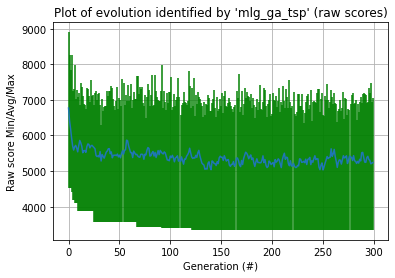

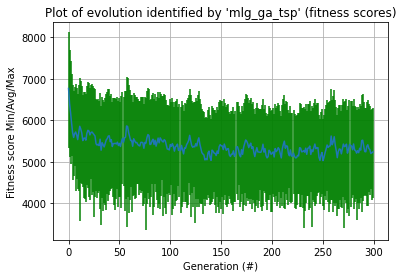

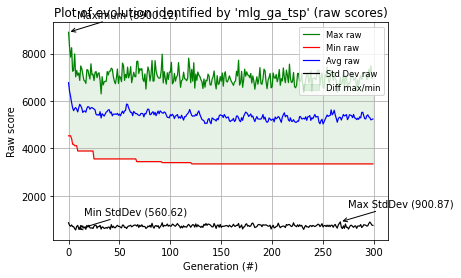

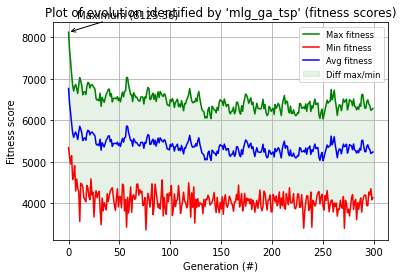

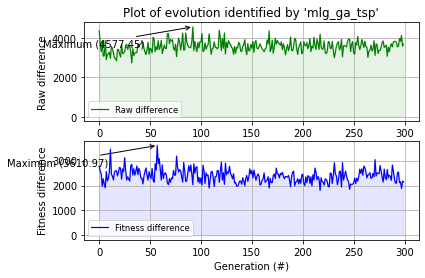

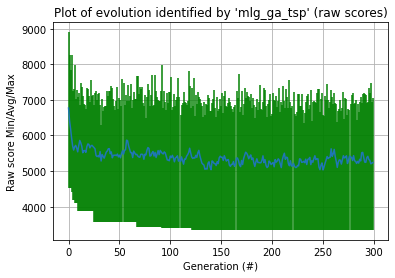

In [67]:
# https://github.com/perone/Pyevolve/blob/master/pyevolve_graph.py
# -0 display all graphs
%run ./Pyevolve/pyevolve_graph.py -i mlg_ga_tsp -1